In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data

df= pd.read_csv("tweets_unbiased_labelled_GPT3_2000.csv")



# Convert string labels to numerical labels
# Create a mapping dictionary to standardize labels
label_mapping = {
    'no verdict': 'no verdict',
    "'no verdict'": 'no verdict',
    "'true'": 'true',
    "'false'": 'false',
    'FALSE': 'false',
    'False': 'false',
    'TRUE': 'true',
    'No verdict': 'no verdict',
    "No verdict": 'no verdict',
    'No verdict': 'no verdict',
    "'No verdict'": 'no verdict',
    "TRUE": 'true',
    "FALSE": 'false',
    "True": 'true',
    "'False'": 'false',
    "'True'": 'true',
    "'without evidence'":'no verdict',
    "'no verdict'.":'no verdict',

}

# applying the mapping dictionary to standardize labels in both datasets
df['Fact_assessment_not_neutral'] = df['Fact_assessment_not_neutral'].map(label_mapping).fillna(df['Fact_assessment_not_neutral'])
df['Fact assessment'] = df['Fact assessment'].map(label_mapping).fillna(df['Fact assessment'])



In [62]:
table = pd.crosstab(df['Fact_assessment_not_neutral'], df['Fact assessment'])
display(table)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,261,238,34
no verdict,63,850,78
true,34,196,246


divide the rows by the row total - probability 

In [63]:
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,0.489681,0.446529,0.063790
no verdict,0.063572,0.857719,0.078708
true,0.071429,0.411765,0.516807


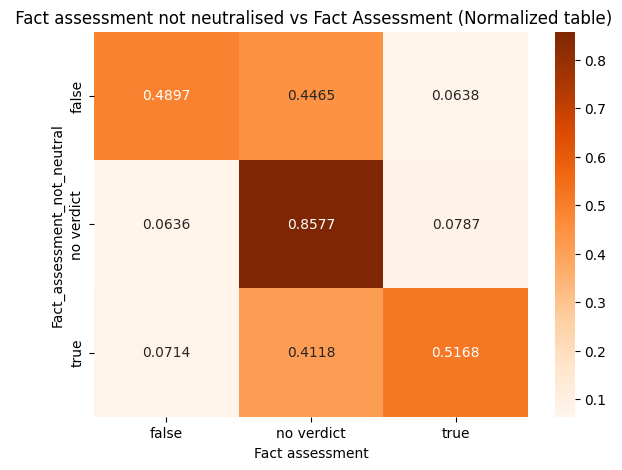

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(table_normalized, annot=True, cmap="Oranges", fmt=".4f")
plt.title(" Fact assessment not neutralised vs Fact Assessment (Normalized table)")
plt.show()


In [65]:

kappa = cohen_kappa_score(df['Fact_assessment_not_neutral'], df['Fact assessment'])

print(f"Cohen's kappa: {kappa:.3f}")


Cohen's kappa: 0.457


Cohen's Kappa is a statistical measure used to quantify the level of agreement between two raters (or judges, observers, etc.) who each classify items into categories. It is 1.0 when there is perfect agreement between the raters.


In [72]:


# converting numerical labels to string labels
df['Toxicity_not_neutral'] = df['Toxicity_not_neutral'].astype(int)
#df['Toxicity'] = df['Toxicity'].astype(str)
df.dropna(subset=['Toxicity'], inplace=True)
df['Toxicity'] = df['Toxicity'].astype(int)


table_toxicity = pd.crosstab(df['Toxicity_not_neutral'], df['Toxicity'])
table_toxicity = table_toxicity.sort_index()
display(table_toxicity)



Toxicity,1,2,3,4,5,6,7,8,9,10
Toxicity_not_neutral,,,,,,,,,,
1,151,25,7,1,0,1,1,0,0,1
2,106,94,43,4,1,2,2,3,0,0
3,60,81,109,23,16,18,32,15,1,0
4,0,0,0,0,1,1,1,0,0,0
6,0,0,1,0,1,3,0,0,0,0
7,26,40,84,18,36,40,131,95,7,2
8,9,8,21,6,8,20,145,306,79,20
9,1,0,0,0,0,0,4,18,25,21
10,0,0,0,0,0,0,0,4,1,14


In [73]:
row_sums_toxicity = table_toxicity.sum(axis=1)
table_normalized_toxicity = table_toxicity.div(row_sums_toxicity, axis=0)
display(table_normalized_toxicity)

Toxicity,1,2,3,4,5,6,7,8,9,10
Toxicity_not_neutral,,,,,,,,,,
1,0.807487,0.133690,0.037433,0.005348,0.000000,0.005348,0.005348,0.000000,0.000000,0.005348
2,0.415686,0.368627,0.168627,0.015686,0.003922,0.007843,0.007843,0.011765,0.000000,0.000000
3,0.169014,0.228169,0.307042,0.064789,0.045070,0.050704,0.090141,0.042254,0.002817,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.200000,0.000000,0.200000,0.600000,0.000000,0.000000,0.000000,0.000000
7,0.054280,0.083507,0.175365,0.037578,0.075157,0.083507,0.273486,0.198330,0.014614,0.004175
8,0.014469,0.012862,0.033762,0.009646,0.012862,0.032154,0.233119,0.491961,0.127010,0.032154
9,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.057971,0.260870,0.362319,0.304348
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210526,0.052632,0.736842


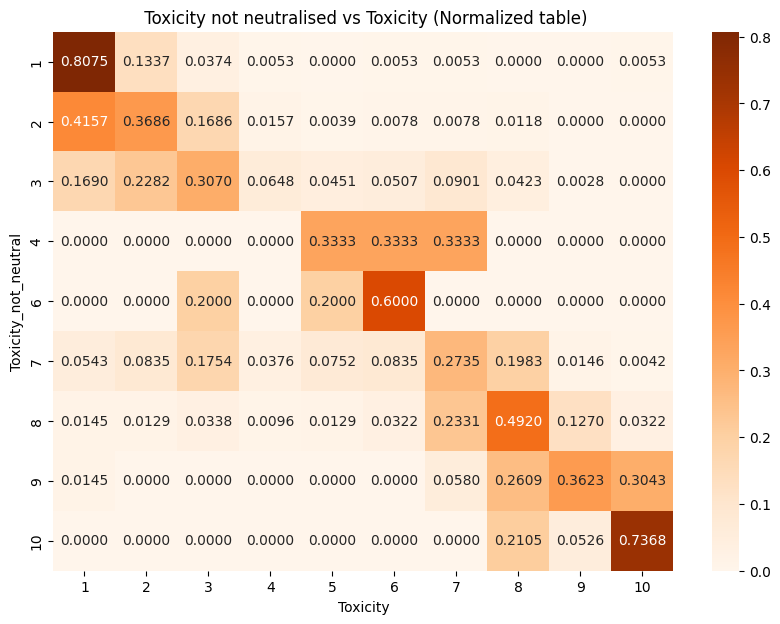

In [75]:
# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(table_normalized_toxicity, annot=True, cmap="Oranges", fmt=".4f")
plt.title(" Toxicity not neutralised vs Toxicity (Normalized table)")
plt.show()

In [69]:
#subset by each candidate and canculate the table for each candidate, 

# now comparing the swithcing probabilites, if removing trump moves much more to no verdict - indicates a bias that trump's name makes the LLM think 
# demographic parity - the layer of tweets 
# individual fairness level is the tweet 

